# SFI 2024 - Rozwiązując korki
### Notebook 2 - Używanie OSMnx

W ramach tego notatnika nauczymy się korzystać z podstawowych funkcji takich bibliotek jak OSMnx (API między OSM na networkx), Folium (interaktywne mapy OSM przy pomocy Pythona) czy GeoPandas (rozszerzenie narzędzia do analizy danych dla GIS).

In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolor
import numpy as np

import folium
import matplotlib

from math import isnan
from matplotlib import cm

Biblioteka OSMnx pozwala na łatwe używanie danych dostępnych w OpenStreetMaps. Dostarcza ona narzędzia do łatwego eksportu danych do formatu NetworkX czy GeoPandas.

Dzięki temu możemy otrzymać w jednej linijce graf dróg dla Krakowa.

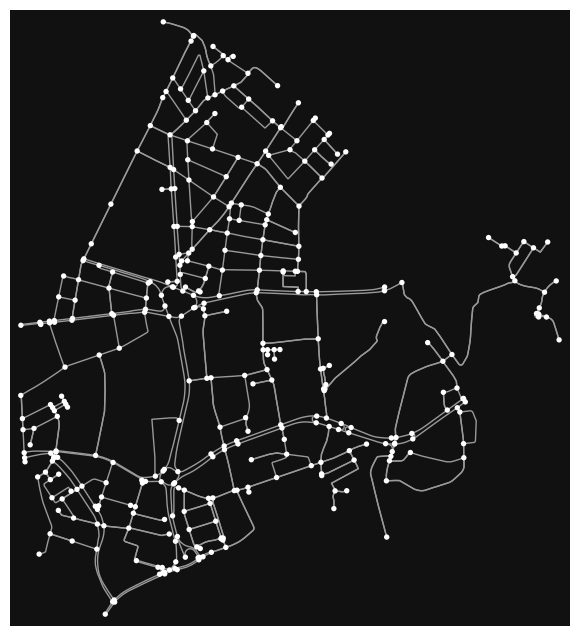

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [2]:
G_raw = ox.graph_from_place('Grzegórzki, Kraków', network_type='drive')
G_proj = ox.project_graph(G_raw)  # <-- Projekcja OSM, domyślnie estymuje heurystycznie najlepszą
ox.plot_graph(G_proj)

### Czy widzisz co jest nie tak z powyższą projekcją dzielnicy Grzegórzki (w kontekście analizy dróg)?
#### Spróbuj zrobić preprocessing dróg przy użyciu biblioteki OSMnx.

Podpowiedź:
[https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.simplification.consolidate_intersections](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.simplification.consolidate_intersections)

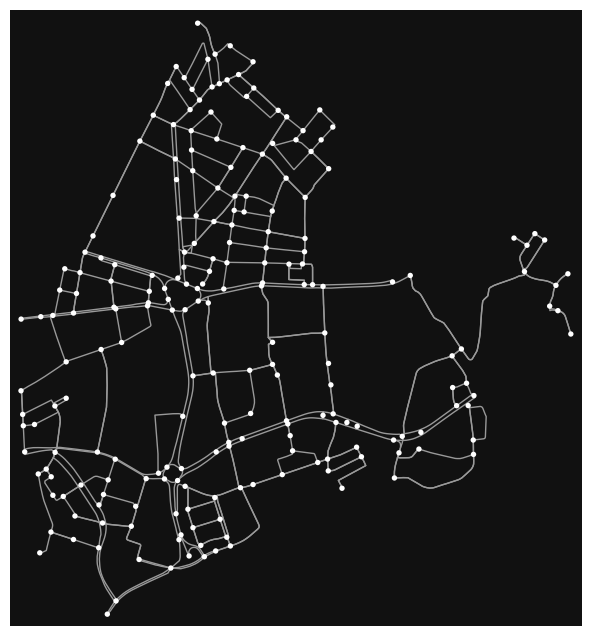

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
G = ox.consolidate_intersections(G_proj, tolerance=20)
ox.plot_graph(G)

***
# Eksploracja danych


#### Sprawdź, jakie atrybuty posiadają krawędzie oraz wierzchołki tego grafu. Czy są jakieś, które mają brakujące wartości? (Na/Null/None). Czy mamy jakieś wartości, które nie są liczbami?

Podpowiedź:
Możesz sprawdzić atrybuty tak jak w NetworkX (notebook 1), lub parsując graf na GeoPandas DataFrame.

[https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.utils_graph.graph_to_gdfs](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.utils_graph.graph_to_gdfs)
[https://stackoverflow.com/questions/26266362/how-do-i-count-the-nan-values-in-a-column-in-pandas-dataframe](https://stackoverflow.com/questions/26266362/how-do-i-count-the-nan-values-in-a-column-in-pandas-dataframe)
[https://stackoverflow.com/questions/21771133/finding-non-numeric-rows-in-dataframe-in-pandas](https://stackoverflow.com/questions/21771133/finding-non-numeric-rows-in-dataframe-in-pandas)
[https://pandas.pydata.org/docs/reference/api/pandas.Series.str.isnumeric.html](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.isnumeric.html)

In [4]:
n, e = ox.graph_to_gdfs(G)
e.head()

osmid   lanes                         name  \
u v   key                                                                
0 1   0                 179246547       2                 Grzegórzecka   
  29  0    [147463160, 216893224]  [2, 3]                 Grzegórzecka   
  158 0                 147463163       2             Świętego Łazarza   
  86  0                  22690772       1  Aleja Ignacego Daszyńskiego   
  87  0                  79963252     NaN                   Metalowców   

               highway maxspeed  oneway reversed      length  \
u v   key                                                      
0 1   0       tertiary       40    True    False  333.262159   
  29  0       tertiary       50    True    False  211.087261   
  158 0    residential       30   False    False  250.531451   
  86  0    residential       30    True    False  245.849609   
  87  0    residential       30   False     True   99.265221   

                                                    geometry  u_original  \
u v   key                                                                  
0 1   0    LINESTRING (424872.147 5545671.650, 424881.979...    34806015   
  29  0    LINESTRING (424872.147 5545671.650, 424882.231...  1314876876   
  158 0    LINESTRING (424872.147 5545671.650, 424882.231...  1314876876   
  86  0    LINESTRING (424872.147 5545671.650, 424862.736...   243362591   
  87  0    LINESTRING (424872.147 5545671.650, 424862.736...   243362591   

           v_original bridge width junction tunnel access  
u v   key                                                  
0 1   0     275652497    NaN   NaN      NaN    NaN    NaN  
  29  0     207469736    NaN   NaN      NaN    NaN    NaN  
  158 0     288604034    NaN   NaN      NaN    NaN    NaN  
  86  0     288495887    NaN   NaN      NaN    NaN    NaN  
  87  0     288496364    NaN   NaN      NaN    NaN    NaN

In [5]:
n.head()

,osmid_original,x,y,street_count,lon,lat,highway,geometry
osmid,,,,,,,,
0,"[34806015, 1314876876, 2055303730, 243362589, ...",424872.147260,5.545672e+06,0,NaN,NaN,NaN,POINT (424872.147 5545671.650)
1,275652497,425184.975526,5.545636e+06,3,19.954801,50.058300,NaN,POINT (425184.976 5545635.980)
2,"[34806052, 798566579]",426390.470545,5.545827e+06,0,NaN,NaN,NaN,POINT (426390.471 5545827.171)
3,"[798566520, 798566479]",426444.093385,5.545808e+06,0,NaN,NaN,NaN,POINT (426444.093 5545807.578)
4,34806059,426633.403234,5.545736e+06,3,19.975013,50.059377,NaN,POINT (426633.403 5545735.748)


In [6]:
e.isna().sum()

osmid           0
lanes         295
name           32
highway         0
maxspeed       53
oneway          0
reversed        0
length          0
geometry        0
u_original      0
v_original      0
bridge        458
width         429
junction      469
tunnel        471
access        453
dtype: int64

In [7]:
e.loc[~e['maxspeed'].str.isnumeric().fillna(False),'maxspeed']

/tmp/ipykernel_20856/4217753497.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  e.loc[~e['maxspeed'].str.isnumeric().fillna(False),'maxspeed']


u    v    key
6    109  0      [50, 30]
12   13   0      [50, 70]
13   113  0           NaN
22   17   0      [50, 70]
24   84   0      [50, 40]
                   ...   
214  112  0           NaN
215  112  0           NaN
     216  0           NaN
216  214  0           NaN
     215  0           NaN
Name: maxspeed, Length: 75, dtype: object

### Sprawdźmy dla jakich ulic występują brakujące wartości. 

W tym celu możemy wyindukować podgraf z G na podstawie krawędzi z brakującymi wartościami i go narysować.

Pamiętaj, że G to multiDiGraph, więc do dostępu do jego krawędzi są potrzebne aż 3 parametry! (u, v, key)

Podpowiedzi:
[https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.edge_subgraph.html](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.edge_subgraph.html)
[https://stackoverflow.com/questions/16031056/how-to-form-tuple-column-from-two-columns-in-pandas](https://stackoverflow.com/questions/16031056/how-to-form-tuple-column-from-two-columns-in-pandas)

In [8]:
sub_e = e[e['maxspeed'].isna()].reset_index()

edges_subset = list(zip(sub_e['u'], sub_e['v'], [0] * len(sub_e.index)))
G_missing_sub = G.edge_subgraph(edges_subset)

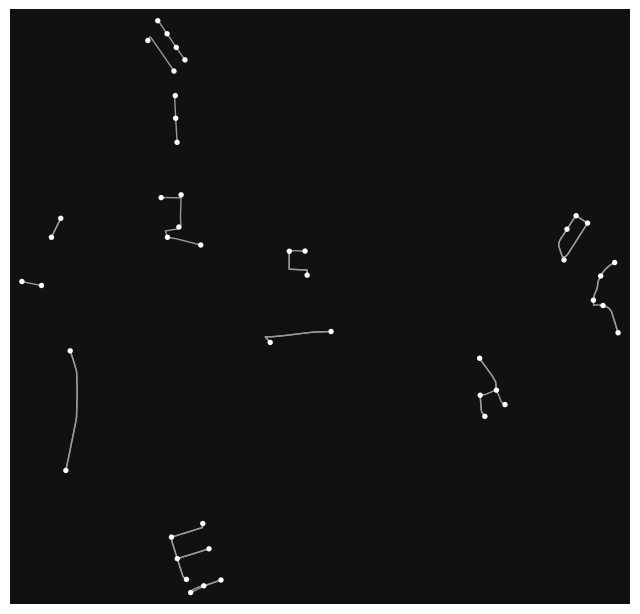

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [9]:
ox.plot_graph(G_missing_sub)

### Rysowanie podgrafu wraz z mapą

In [10]:
_, sub_e = ox.graph_to_gdfs(G_missing_sub) 

m = folium.Map(location=ox.geocode('Grzegórzki, Kraków'), dragging=False, zoom_control=False, scrollWheelZoom=False,
               zoom_start=14)

folium.GeoJson(sub_e, style_function=lambda x: {'fillColor': '#228B22', 'lineColor': '#228B22'}).add_to(m)

m

### Na podstawie mapy wybierz, jaka prędkość byłaby najlepsza dla ulic, które nie mają jej przypisanej i uzupełnij brakujące pola. Możesz to zrobić, korzystając z grafu NetworkX lub transformując graf do GeoPandas, robiąc processing danych i transformując dane spowrotem do grafu.

Dla wierszy z listą prędkości zaaplikuj najmniejszą prędkość.

Przydatne linki:
[https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.utils_graph.graph_from_gdfs](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.utils_graph.graph_from_gdfs)
[https://stackoverflow.com/questions/17051589/parsing-through-edges-in-networkx-graph](https://stackoverflow.com/questions/17051589/parsing-through-edges-in-networkx-graph)
[https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.fillna.html](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.fillna.html)
[https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html)

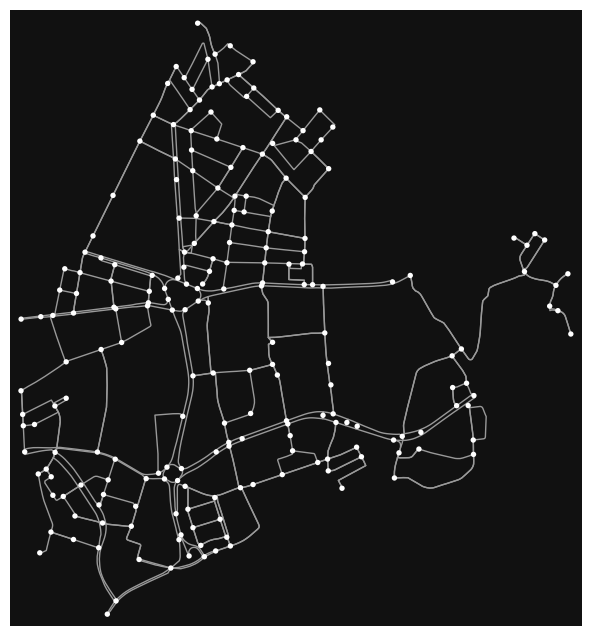

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [11]:
n, e = ox.graph_to_gdfs(G)

def fix_maxspeed(value):
    def inner_f(value):
        if isinstance(value, list):
            return min(value)
        if value is None or value == np.nan or isnan(float(value)):
            return 50.0
        return value
    return float(inner_f(value))

e['maxspeed'] = e['maxspeed'].apply(fix_maxspeed)

G_ready = ox.graph_from_gdfs(n, e)
ox.plot_graph(G_ready)

### Na koniec spróbujmy narysować pełną wizualizację naszego grafu, korzystając z biblioteki folium.
Stwórz dwie wizualizacje w celu sprawdzenia poprawności grafu. Jedną z drogami jedno- i dwukierunkowymi oraz drugą z dopuszczalnymi prędkościami.

In [12]:
# Pierwsza wizualizacja - wykorzystaj funkcję folium.GeoJson, przekazując do niej funkcję style_func, która w zależności od parametru oneway będzie zwracać słownik {'color': 'HEX_VALUE'}
m = folium.Map(location=ox.geocode('Grzegórzki, Kraków'), dragging=False, zoom_control=False, scrollWheelZoom=False,
               zoom_start=14)

nodes, edges = ox.graph_to_gdfs(G_ready)

def basic_style_func(edge):
    if edge['properties']['oneway']:
        return {'color': '#ff0000'}
    return {'color': '#0000ff'}


folium.GeoJson(edges, style_function=basic_style_func).add_to(m)

m

### Stworzenie drugiej mapy wymaga przydzielania kolorów do zmiennej ciągłej. W tym celu możemy wykorzystać colormapy z biblioteki matplotlib.

In [18]:
def get_cmap(vmin, vmax, cmap='viridis'):
    cmap = cm.get_cmap(cmap)
    norm = mcolor.Normalize(vmin=vmin, vmax=vmax)
    final_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
    return final_cmap

In [19]:
def edge_embedding(hex_val):
    # Funkcja pomocniczna budująca słownik dla GeoJson
    return {'color': hex_val, 'weight': '3'}

In [20]:
def style_fun(e, vmin, vmax, attr='maxspeed', *_args):
    cmap = get_cmap(vmin, vmax)
    rgba_val = cmap.to_rgba(e['properties'][attr])
    hex_val = mcolor.to_hex(rgba_val)

    return edge_embedding(hex_val)

In [21]:
def get_value_range(_edges, attr):
    p = _edges[attr]
    return p.min(), p.max()

In [22]:
def edges_geojson(_edges, attr):
    # Zbuduj obiekt GeoJson
    vmin, vmax = get_value_range(_edges, attr)

    return folium.GeoJson(_edges, style_function=lambda x: style_fun(x, vmin, vmax, attr))

In [23]:
m = folium.Map(location=ox.geocode('Grzegórzki, Kraków'), dragging=False, zoom_control=False, scrollWheelZoom=False,
               zoom_start=14)

edges_geojson(edges, 'maxspeed').add_to(m)

m

/tmp/ipykernel_20856/145632223.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap)
